# 23MCD001 Practical-2

In [8]:
import numpy as np

def check_valid_pdf(num_outcomes, values, probabilities):
    if num_outcomes != len(values) or num_outcomes != len(probabilities):
        return False, "Number of outcomes, values, and probabilities must be consistent."
    if sum(probabilities) == 1:
        return True, "Valid PDF."
    else:
        return False, "Probabilities do not sum up to 1."

def calculate_mean(values, probabilities):
    return np.dot(values, probabilities)

def calculate_variance(values, probabilities, mean):
    return np.dot(probabilities, (values - mean)**2)

def m():
  try:
    num_outcomes = int(input("Enter the number of possible outcomes: "))
    assert(num_outcomes > 0), 'Number must be bigger than 0'
  except:
    m()
  try:
    values = [float(val) for val in input("Enter values by space: ").split(' ')]
  except:
    m()
  try:
    probabilities = [float(prob) for prob in input("Enter probabilities by space: ").split(' ')]
  except:
    m()


  is_valid, message = check_valid_pdf(num_outcomes, values, probabilities)
  mean = calculate_mean(values, probabilities)
  variance = calculate_variance(values, probabilities, mean)
  if is_valid == True:
    print(message)
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
  else:
    print(message)
    print('-------------------------------------------------------------')
    m()

m()

Probabilities do not sum up to 1.
-------------------------------------------------------------
Probabilities do not sum up to 1.
-------------------------------------------------------------
Valid PDF.
Mean: 0.7999999999999999
Variance: -0.24000000000000005


In [13]:
import numpy as np

def check_valid_pdf(num_outcomes, values, probabilities):
    if num_outcomes != len(values) or num_outcomes != len(probabilities):
        return False, "Number of outcomes, values, and probabilities must be consistent."
    if sum(probabilities) == 1 and all(p >= 0 for p in probabilities):
        return True, "Valid PDF."
    else:
        if sum(probabilities) != 1:
            return False, "Probabilities do not sum up to 1."
        else:
            return False, "All probabilities must be non-negative."

def calculate_mean(values, probabilities):
    return np.dot(values, probabilities)

def calculate_variance(values, probabilities, mean):
    return np.dot(probabilities, (values - mean)**2)

def get_positive_integer_input(prompt):
    while True:
        try:
            value = int(input(prompt))
            assert value > 0, 'Number must be bigger than 0'
            return value
        except (ValueError, AssertionError):
            print("Invalid input. Please enter a positive integer.")

def get_float_list_input(prompt):
    while True:
        try:
            values = [float(val) for val in input(prompt).split(' ')]
            return values
        except ValueError:
            print("Invalid input. Please enter valid floating-point numbers.")

def m():
    num_outcomes = get_positive_integer_input("Enter the number of possible outcomes: ")
    values = get_float_list_input("Enter values by space: ")
    probabilities = get_float_list_input("Enter probabilities by space: ")

    is_valid, message = check_valid_pdf(num_outcomes, values, probabilities)
    mean = calculate_mean(values, probabilities)
    variance = calculate_variance(values, probabilities, mean)
    
    if is_valid:
        print(message)
        print(f"Mean: {mean}")
        print(f"Variance: {variance}")
    else:
        print(message)
        print('-------------------------------------------------------------')
        m()

m()


Invalid input. Please enter valid floating-point numbers.


ValueError: shapes (1,) and (2,) not aligned: 1 (dim 0) != 2 (dim 0)

Valid PDF.
Mean: 2.1
Variance: 0.69


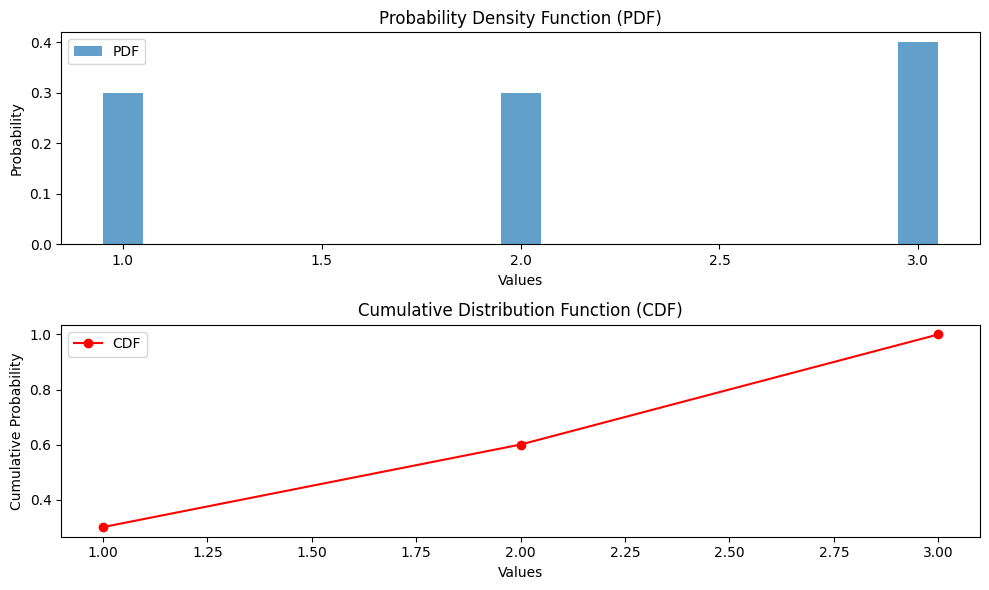

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def check_valid_pdf(num_outcomes, values, probabilities):
    if num_outcomes != len(values) or num_outcomes != len(probabilities):
        return False, "Number of outcomes, values, and probabilities must be consistent."
    if sum(probabilities) == 1 and all(p >= 0 for p in probabilities):
        return True, "Valid PDF."
    else:
        if sum(probabilities) != 1:
            return False, "Probabilities do not sum up to 1."
        else:
            return False, "All probabilities must be non-negative."

def calculate_mean(values, probabilities):
    return np.dot(values, probabilities)

def calculate_variance(values, probabilities, mean):
    return np.dot(probabilities, (values - mean)**2)

def plot_pdf_cdf(values, probabilities, mean, variance):
    x = np.array(values)
    pdf = probabilities
    cdf = np.cumsum(pdf)

    plt.figure(figsize=(10, 6))


    plt.subplot(2, 1, 1)
    plt.bar(x, pdf, width=0.1, alpha=0.7, label='PDF')
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Values')
    plt.ylabel('Probability')
    plt.legend()

  
    plt.subplot(2, 1, 2)
    plt.plot(x, cdf, marker='o', linestyle='-', color='r', label='CDF')
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()

    plt.tight_layout()
    plt.show()

def get_positive_integer_input(prompt):
    while True:
        try:
            value = int(input(prompt))
            assert value > 0, 'Number must be bigger than 0'
            return value
        except (ValueError, AssertionError):
            print("Invalid input. Please enter a positive integer.")

def get_float_list_input(prompt):
    while True:
        try:
            values = [float(val) for val in input(prompt).split(' ')]
            return values
        except ValueError:
            print("Invalid input. Please enter valid floating-point numbers.")

def m():
    num_outcomes = get_positive_integer_input("Enter the number of possible outcomes: ")
    values = get_float_list_input("Enter values by space: ")
    probabilities = get_float_list_input("Enter probabilities by space: ")

    is_valid, message = check_valid_pdf(num_outcomes, values, probabilities)
    mean = calculate_mean(values, probabilities)
    variance = calculate_variance(values, probabilities, mean)
    
    if is_valid:
        print(message)
        print(f"Mean: {mean}")
        print(f"Variance: {variance}")
        plot_pdf_cdf(values, probabilities, mean, variance)
    else:
        print(message)
        print('-------------------------------------------------------------')
        m()

m()


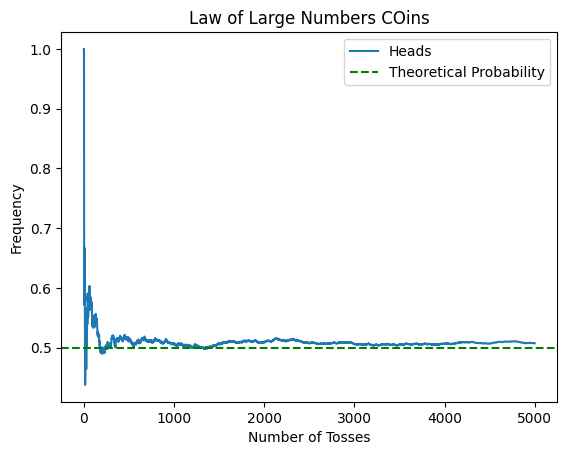

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_coin_toss(num_tosses, probability):
    outcomes = ['Heads' if np.random.binomial(1, probability) == 1 else 'Tails' for _ in range(num_tosses)]
    return outcomes

def calculate_relative_frequencies(outcomes):
    num_heads = outcomes.count('Heads')
    num_tails = outcomes.count('Tails')
    relative_frequency_heads = num_heads / len(outcomes)
    relative_frequency_tails = num_tails / len(outcomes)
    return relative_frequency_heads, relative_frequency_tails

def plot_relative_frequencies(relative_frequencies_heads, relative_frequencies_tails):
    plt.plot(relative_frequencies_heads, label='Heads')
    plt.axhline(0.5, color='green', linestyle='--', label='Theoretical Probability')
    plt.xlabel('Number of Tosses')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Law of Large Numbers COins')
    plt.show()

num_tosses = int(input("Enter : "))
probability = 0.5
outcomes = simulate_coin_toss(num_tosses, probability)
relative_frequencies_heads, relative_frequencies_tails = zip(*[calculate_relative_frequencies(outcomes[:i+1]) for i in range(num_tosses)])
plot_relative_frequencies(relative_frequencies_heads, relative_frequencies_tails)

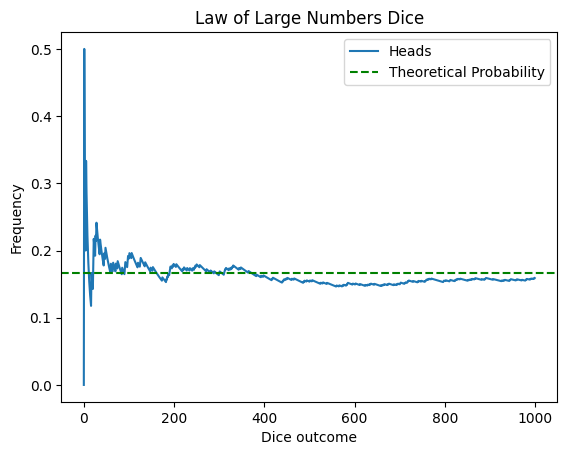

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_coin_toss(num_tosses, probability):
    outcomes = ['Heads' if np.random.binomial(1, probability) == 1 else 'Tails' for _ in range(num_tosses)]
    return outcomes

def calculate_relative_frequencies(outcomes):
    num_heads = outcomes.count('Heads')
    num_tails = outcomes.count('Tails')
    relative_frequency_heads = num_heads / len(outcomes)
    relative_frequency_tails = num_tails / len(outcomes)
    return relative_frequency_heads, relative_frequency_tails

def plot_relative_frequencies(relative_frequencies_heads, relative_frequencies_tails):
    plt.plot(relative_frequencies_heads, label='Heads')
    plt.axhline(0.167, color='green', linestyle='--', label='Theoretical Probability')
    plt.xlabel('Dice outcome')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Law of Large Numbers Dice')
    plt.show()

num_tosses = int(input("Enter the number of dice for trial: "))
probability = 0.167
outcomes = simulate_coin_toss(num_tosses, probability)
relative_frequencies_heads, relative_frequencies_tails = zip(*[calculate_relative_frequencies(outcomes[:i+1]) for i in range(num_tosses)])
plot_relative_frequencies(relative_frequencies_heads, relative_frequencies_tails)